# Exercise 14

## Kaggle competition 

* Overview of how Kaggle works ([slides](https://github.com/justmarkham/DAT8/raw/master/slides/16_kaggle.pdf))
* Predict how popular a news article will be 

# Exercise 14.1 (20 points)

Create a submission using different classification methods, preprocessing extrategies and cross-validation techniques discussed during the class. The output must be detailed in this notebook.

# Exercise 14.2 (20 points)

The reminder points will be allocated based on the performance of each one submission.

# Read the datasets

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('14_mashable_train_df.csv', index_col=0)
train_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2013/09/16/sprints-upgrade...,479,11,1045,0.407946,1,0.617021,29,3,1,...,0.033333,1.0,-0.305139,-0.700000,-0.125000,0.0,0.0,0.5,0.0,1
1,http://mashable.com/2014/12/06/eric-garner-pro...,31,14,0,0.000000,0,0.000000,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,1.0,-0.5,0.5,0.5,0
2,http://mashable.com/2013/06/06/human-scale-inv...,581,6,604,0.470000,1,0.675516,9,0,1,...,0.100000,1.0,-0.215873,-0.666667,-0.071429,0.1,0.0,0.4,0.0,0
3,http://mashable.com/2014/11/24/beyonce-spotify...,44,16,708,0.474286,1,0.675325,5,2,2,...,0.062500,0.5,-0.376852,-0.875000,-0.100000,0.4,-0.2,0.1,0.2,0
4,http://mashable.com/2013/03/03/superheroic-let...,676,7,30,1.000000,1,1.000000,2,1,0,...,0.250000,0.7,0.000000,0.000000,0.000000,0.0,0.0,0.5,0.0,1


In [3]:
test_df = pd.read_csv('14_mashable_test_df.csv', index_col=0)
test_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
23786,http://mashable.com/2014/06/19/paris-adds-kids...,203,15,495,0.483122,1,0.683824,4,1,3,...,0.298242,0.136364,0.5,-0.241026,-0.8,-0.100,0.5,0.375,0.0,0.375
23787,http://mashable.com/2014/10/11/walgreens-memo-...,87,12,263,0.596958,1,0.722581,4,2,1,...,0.293506,0.200000,0.7,-0.201806,-0.4,-0.125,0.2,0.200,0.3,0.200
23788,http://mashable.com/2013/11/24/job-satisfaction/,410,12,246,0.669456,1,0.856164,9,6,0,...,0.320000,0.100000,0.5,-0.262500,-0.4,-0.125,0.0,0.000,0.5,0.000
23789,http://mashable.com/2014/02/05/is-this-the-new...,337,15,443,0.625616,1,0.752727,6,3,0,...,0.355803,0.100000,1.0,-0.325769,-0.6,-0.100,0.0,0.000,0.5,0.000
23790,http://mashable.com/2014/02/25/blackberry-ceo-...,317,11,195,0.659794,1,0.847458,6,0,1,...,0.288300,0.033333,1.0,-0.178611,-0.4,-0.050,0.0,0.000,0.5,0.000


# Model

## DT

In [4]:
X = train_df.drop(['url', 'Popular'], axis=1)
y = train_df['Popular'].values

# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)

# make predictions for testing set
y_pred_class = dt.predict(X_test)

# calculate testing accuracy
from sklearn import metrics
print(metrics.fbeta_score(y_test, y_pred_class, beta=2))

0.212530712531


## LR

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)

lr.fit(X_train, y_train)

# make predictions for testing set
y_pred_class = lr.predict(X_test)

# calculate testing accuracy
from sklearn import metrics
print(metrics.fbeta_score(y_test, y_pred_class, beta=2))

0.0093574547723


In [6]:
y_pred_class.mean()

0.0016815200941651253

## Under-sample

In [7]:
import numpy as np
filter_ = (y_train == 1) | ((y_train == 0) & (np.random.rand(y_train.shape[0])>0.7))
y_train[filter_].mean(), y_train[filter_].shape

(0.32429378531073444, (7080,))

In [8]:
lr.fit(X_train.loc[filter_], y_train[filter_])
# make predictions for testing set
y_pred_class = lr.predict(X_test)

# calculate testing accuracy
print(metrics.fbeta_score(y_test, y_pred_class, beta=2))

0.209980910826


## DT

In [9]:
from sklearn.naive_bayes import GaussianNB

models = {'nb': GaussianNB()}

In [10]:
from sklearn.cross_validation import train_test_split

for model in models.keys():
    models[model].fit(X_train, y_train)

In [11]:
# predict test for each model
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

In [12]:
from sklearn import metrics
for model in models.keys():
    print(model, 'fbeta',metrics.fbeta_score(y_pred[model],y_test,beta=4))

nb fbeta 0.267633894119


In [13]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

In [14]:
X_u, y_u = UnderSampling(X_train, y_train,0.5,321)

for model in models.keys():
    models[model].fit(X_u, y_u)
    
# predict test for each model
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)
    

from sklearn import metrics
for model in models.keys():
    print(model, 'fbeta',metrics.fbeta_score(y_pred[model],y_test,beta=2))

nb fbeta 0.270908585718


## GradientBoostingClassifier

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
clf = GradientBoostingClassifier()
clf.fit(X_train,y_train)
y_pred_proba = clf.predict_proba(X_test)[: ,1]

In [17]:
res = []
thresholds = np.arange(0, 1, 0.01)

for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(np.int)
    res.append(metrics.fbeta_score(y_test,y_pred,2))

/Users/FelipeGarcia/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


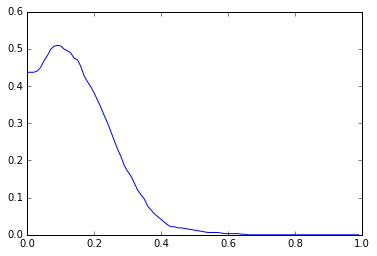

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(thresholds,res)

In [19]:
np.max(res)

0.5091959264325886

In [20]:
np.argmax(res)

9

In [21]:
thresholds[9]

0.089999999999999997

In [22]:
def results(y_pres,y_test):
    fbeta = metrics.fbeta_score(y_test,y_pred,2)
    
    return fbeta

In [23]:
y_pred = (y_pred_proba >= thresholds[9]).astype(int)
results(y_pred,y_test)

0.5091959264325886

# Apply model to Test set

In [24]:
y_pred_proba = clf.predict_proba(test_df.drop('url', axis=1))[:, 1]
predictions = (y_pred_proba >= thresholds[9]).astype(int)



In [25]:
#predictions = dt.predict(test_df.drop('url', axis=1))

In [27]:
# Kaggle needs the submission to have a certain format;
submission = pd.DataFrame({ 'ArticleID': test_df.index,
                            'Popular': predictions })
submission.to_csv("14_kaggle_submission_ESTESI.csv", index=False)